<a href="https://colab.research.google.com/github/adhang/data-science-digital-skola/blob/update/19.%20Machine%20Learning/Learn%20-%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learn - Clustering
Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)

___

# Importing Libraries

In [ ]:
!pip install kneed
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 5.0 MB/s 


In [ ]:
# basic
import pandas as pd
import numpy as np
import scipy.stats as stats

# viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN

# metrics & hyperparameter
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# Reading Dataset
Dataset from [Kaggle](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

In [ ]:
path = 'https://raw.githubusercontent.com/ganjar87/data_science_practice/main/CC%20GENERAL.csv'

data = pd.read_csv(path)
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
data.columns = data.columns.str.lower()

data.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# EDA & Data Preprocessing

## Basic Info

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

In [ ]:
data.drop('cust_id', axis=1, inplace=True)
data.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
balance,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
balance_frequency,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
purchases,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
oneoff_purchases,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
installments_purchases,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
cash_advance,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
purchases_frequency,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
oneoff_purchases_frequency,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
purchases_installments_frequency,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
cash_advance_frequency,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


## Box Plot

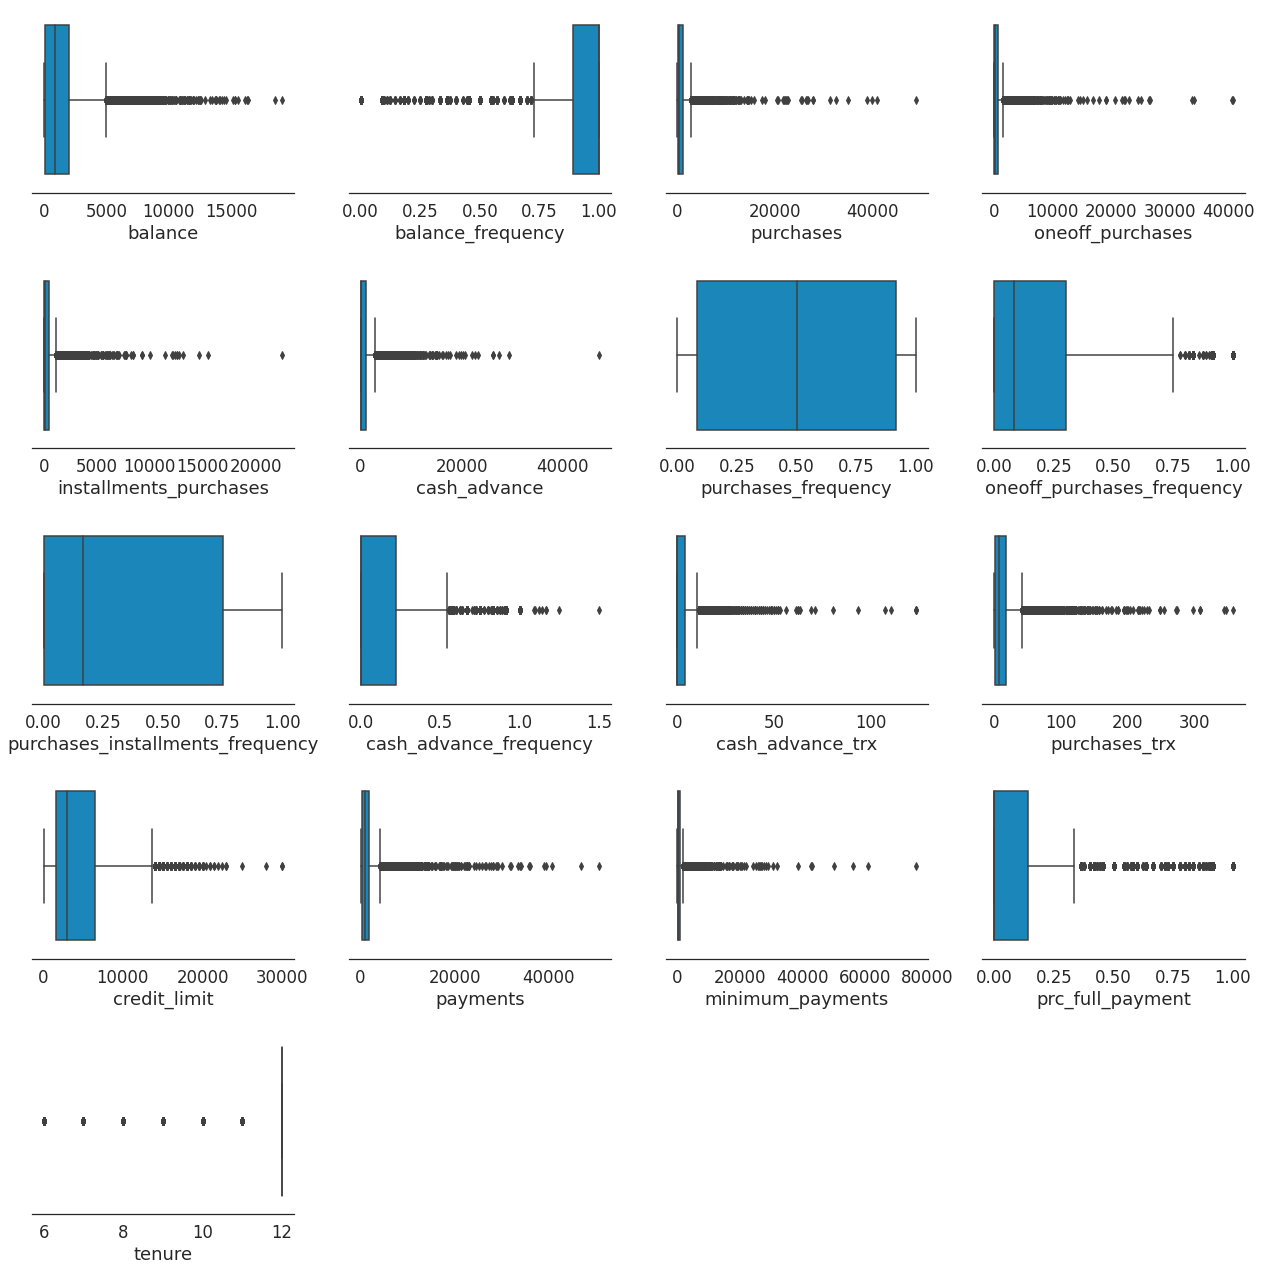

In [ ]:
fig, ax = plt.subplots(5,4, figsize=(18,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(list(data.columns)):
  sns.boxplot(data=data, x=col, ax=axes_list[i])

axes_list[-1].set_visible(False)
axes_list[-2].set_visible(False)
axes_list[-3].set_visible(False)

sns.despine(left=True)
plt.tight_layout()
plt.show()

## Fill Missing Values

In [ ]:
data.isna().sum()

balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [ ]:
data.fillna(data.median(), inplace=True)

In [ ]:
data.isna().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

## Histogram

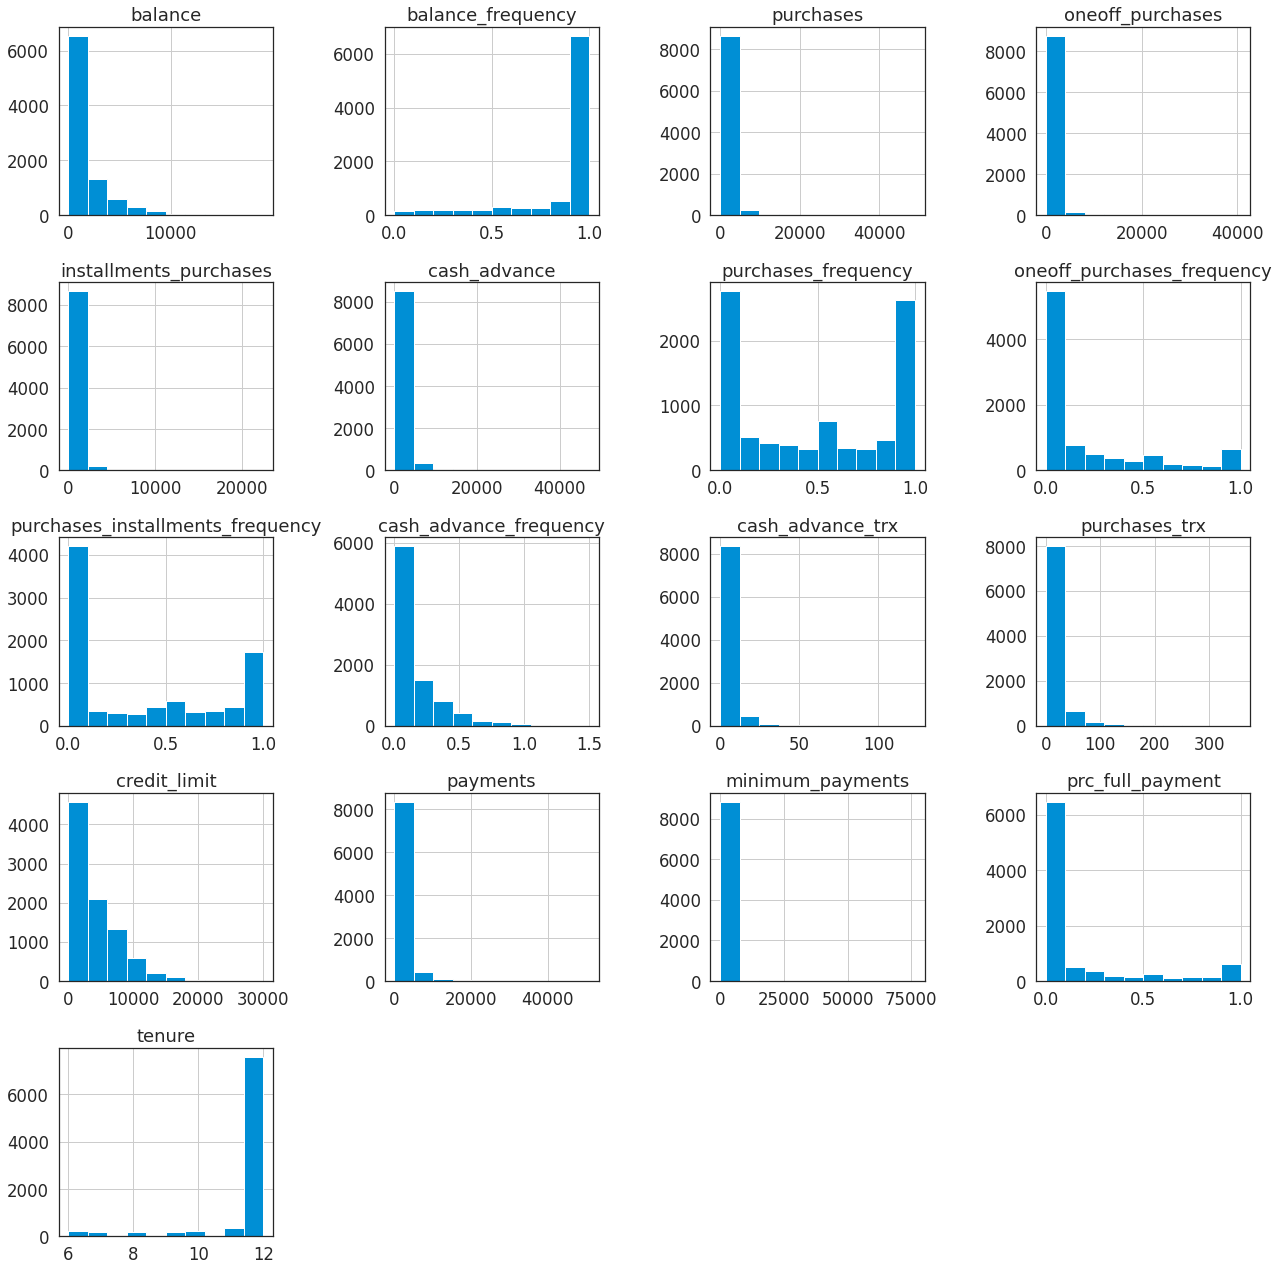

In [ ]:
data.hist(figsize=(18,18))

plt.tight_layout()
plt.show()

## Density Plot

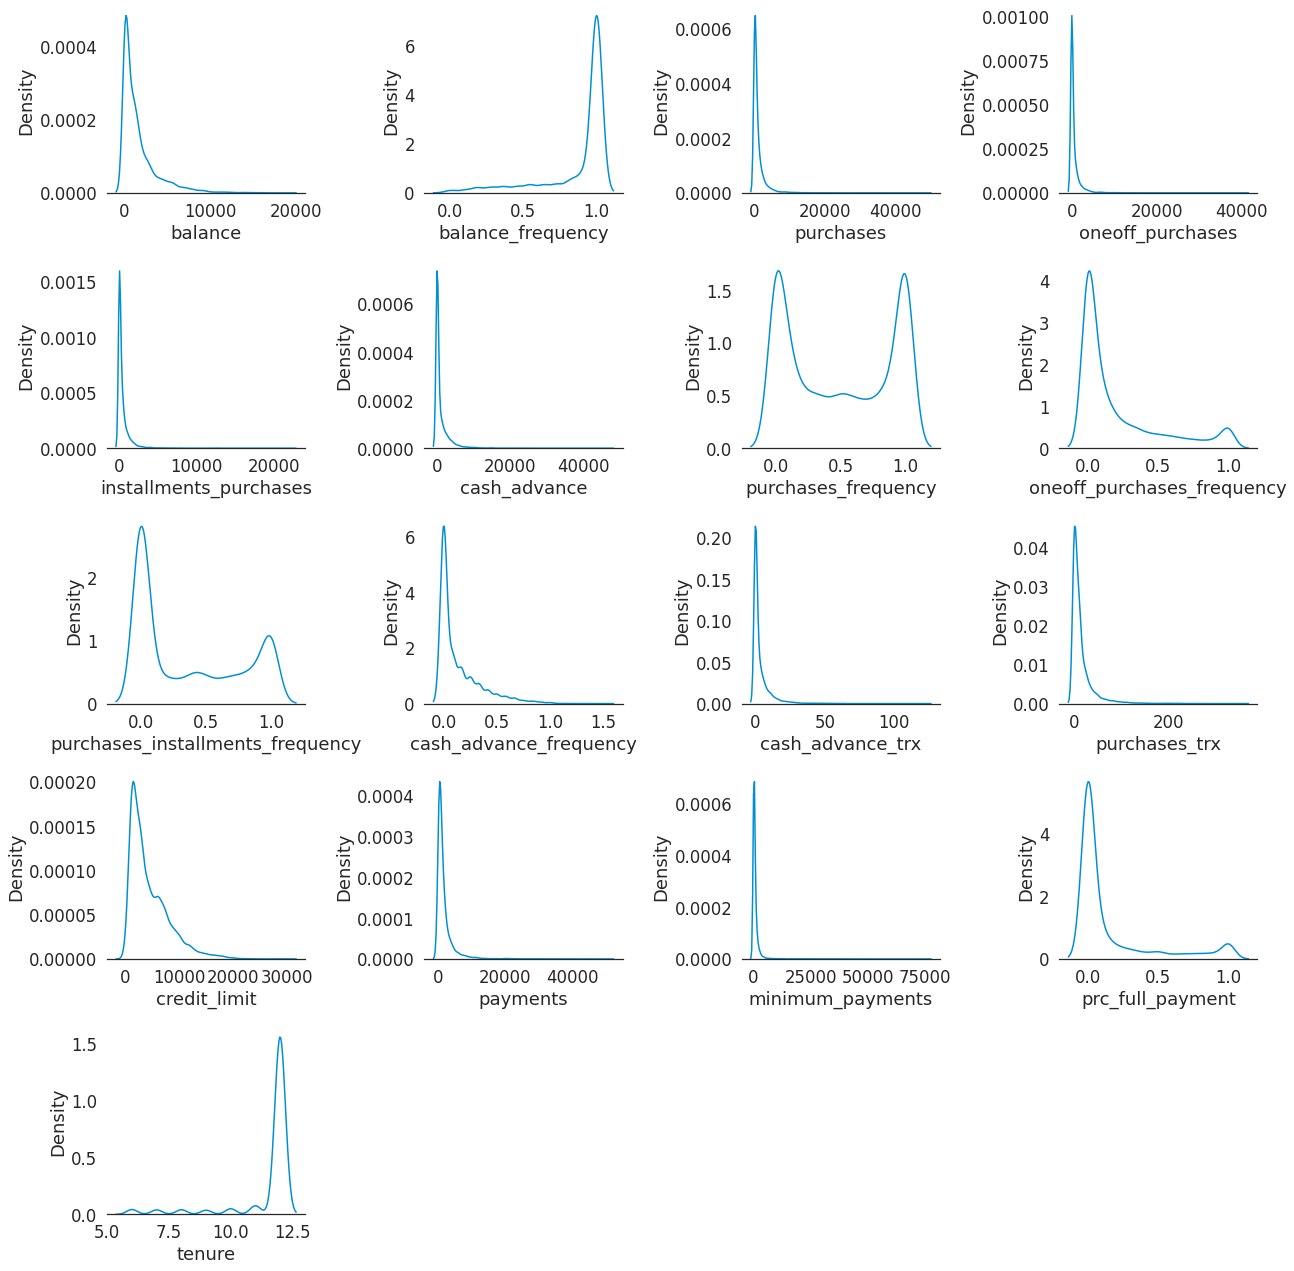

In [ ]:
fig, ax = plt.subplots(5,4, figsize=(18,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(list(data.columns)):
  sns.kdeplot(data=data, x=col, ax=axes_list[i])

axes_list[-1].set_visible(False)
axes_list[-2].set_visible(False)
axes_list[-3].set_visible(False)

sns.despine(left=True)
plt.tight_layout()
plt.show()

## Heatmap Correlation

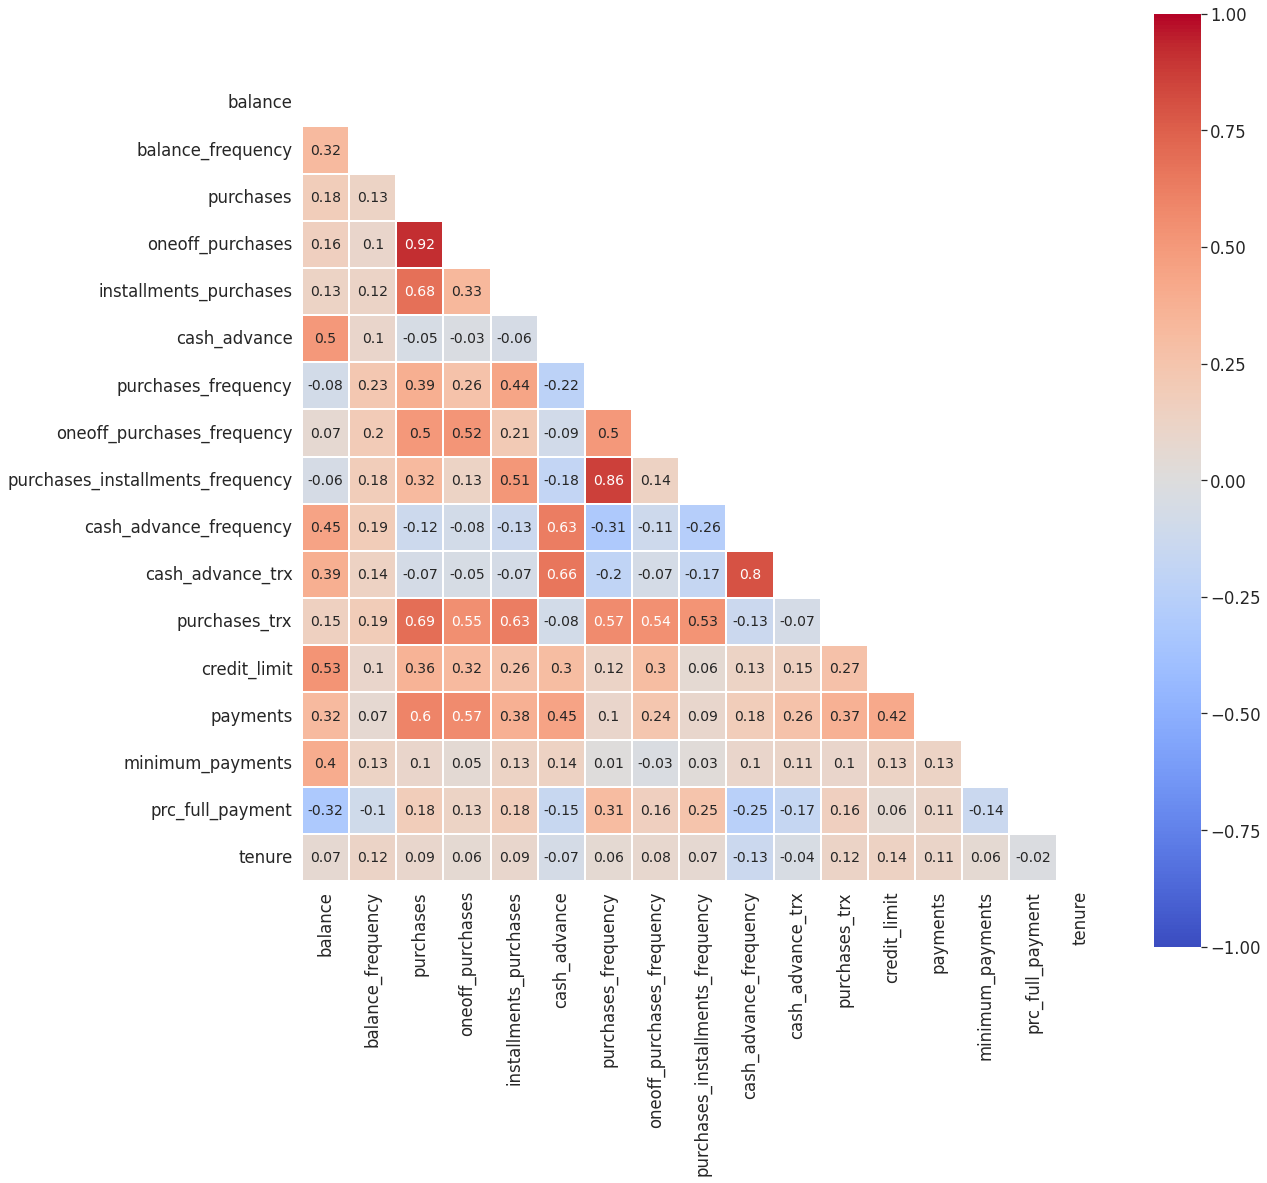

In [ ]:
corr_matrix = data.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(16,16))

sns.heatmap(corr_matrix.round(2), center=0, vmin=-1, vmax=1, mask=mask,
            annot=True, square=True, linewidth=1, cmap='coolwarm',
            annot_kws={'fontsize':14}, ax=ax)

plt.show()

## Feature Scaling

### Standardization

In [ ]:
data_std = data.copy()

for i in data_std.columns:
  scaler = StandardScaler()
  scaler.fit(data_std[[i]])

  data_std[[i]] = scaler.transform(data_std[[i]])

data_std.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


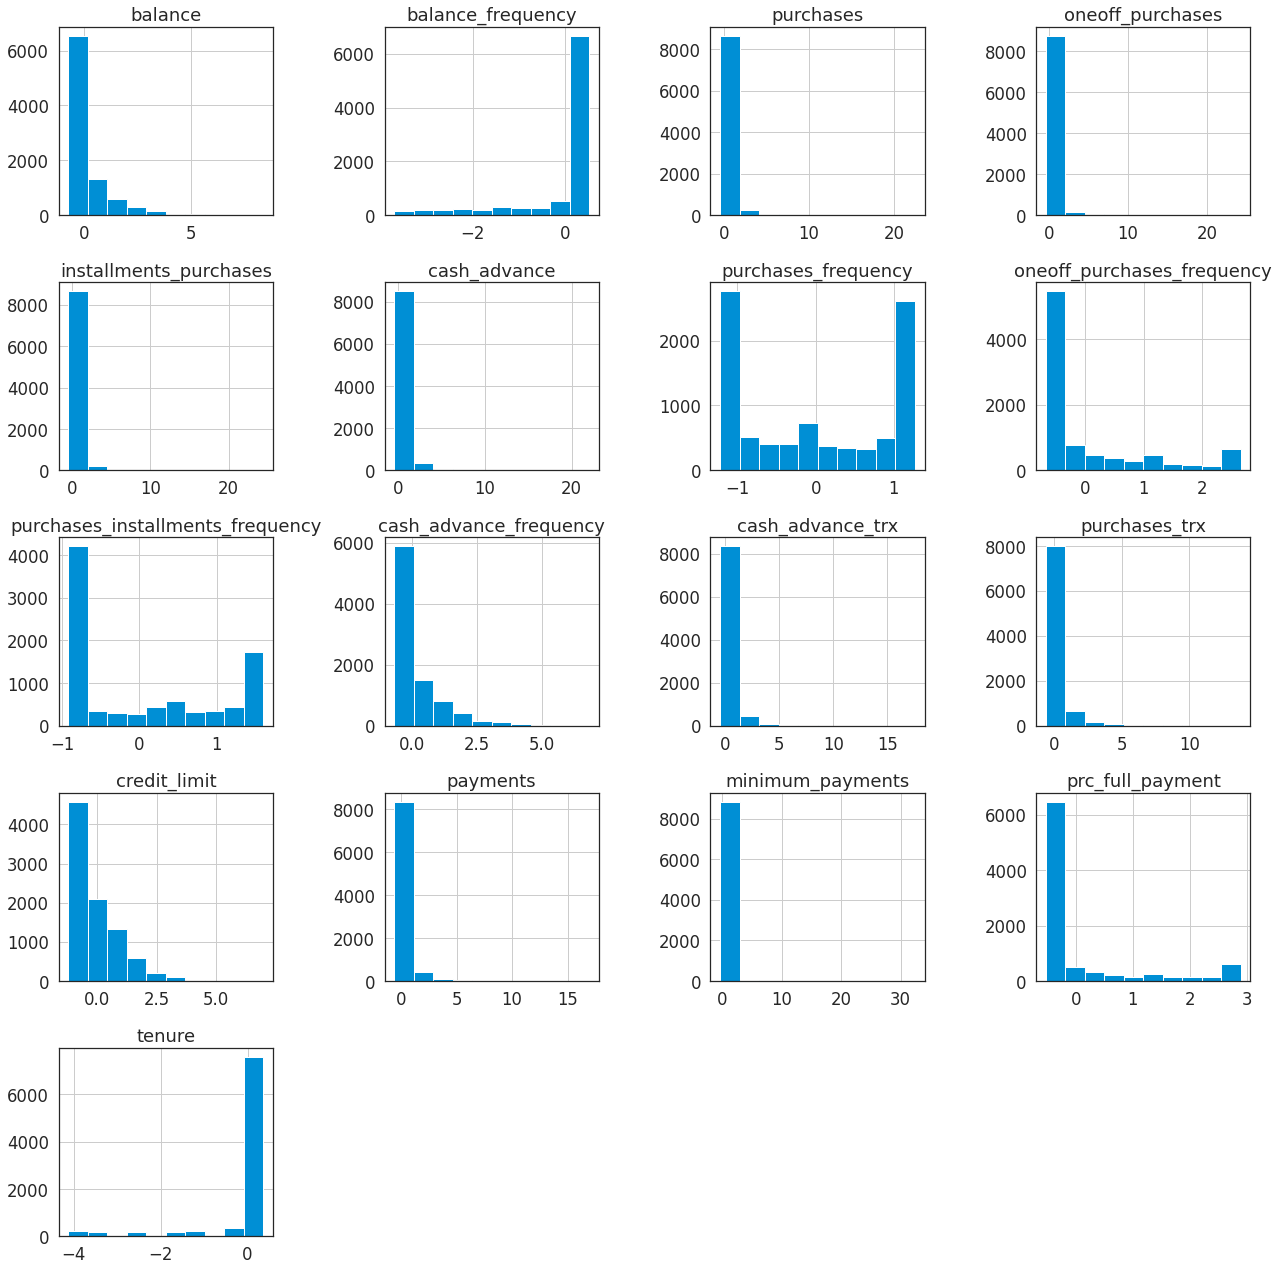

In [ ]:
data_std.hist(figsize=(18,18))

plt.tight_layout()
plt.show()

### Normalization

In [ ]:
data_norm = data_std.copy()

for i in data_norm.columns:
  scaler = MinMaxScaler()
  scaler.fit(data_norm[[i]])

  data_norm[[i]] = scaler.transform(data_norm[[i]])

data_norm.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


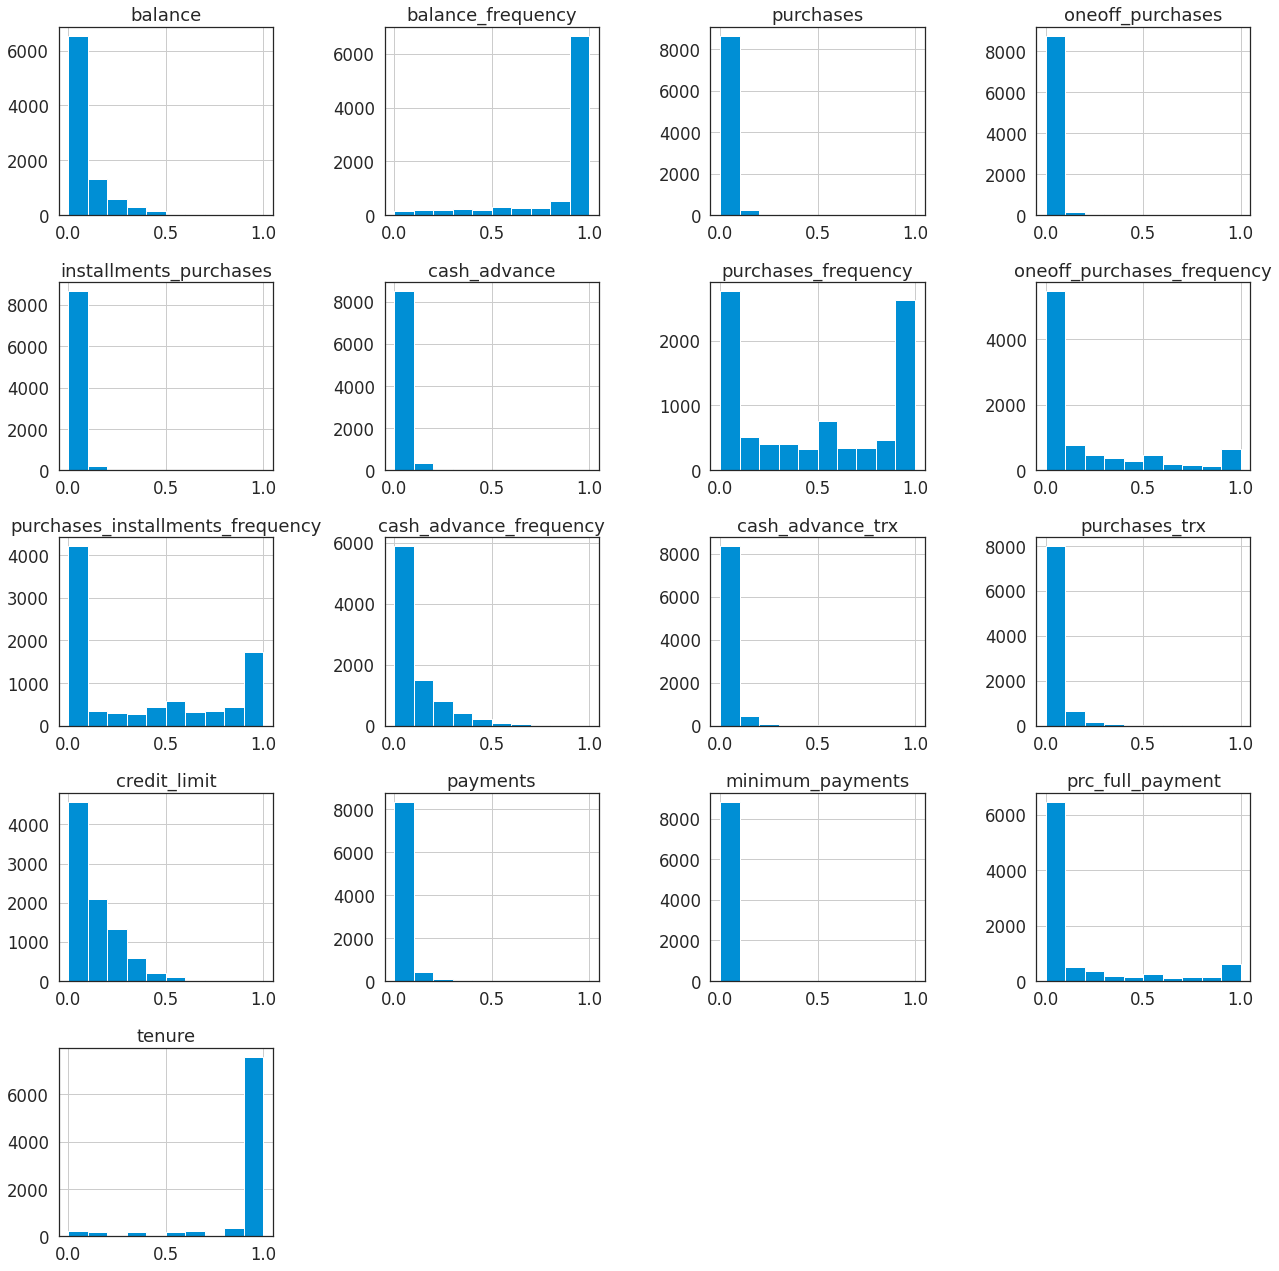

In [ ]:
data_norm.hist(figsize=(18,18))

plt.tight_layout()
plt.show()

## Feature Array

In [ ]:
X_std = data_std.values
X_std

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

In [ ]:
X_norm = data_norm.values
X_norm

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, ...,
        1.82564563e-03, 0.00000000e+00, 1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        1.40344791e-02, 2.22222000e-01, 1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, ...,
        8.20961806e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 2.94456089e-03, ...,
        1.07843629e-03, 2.50000000e-01, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        7.29475795e-04, 2.50000000e-01, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 2.22932216e-02, ...,
        1.15527021e-03, 0.00000000e+00, 0.00000000e+00]])

# K-Means

## Elbow Method

In [154]:
inertia_list = []
k_range = np.arange(1,11)

for num_clusters in k_range:
    model = KMeans(n_clusters=num_clusters)
    model.fit(X_norm)
    inertia_list.append(model.inertia_)
    print(f'For n_clusters = {num_clusters}, inertia value is {round(model.inertia_,3)}')

For n_clusters = 1, inertia value is 5935.415
For n_clusters = 2, inertia value is 3508.163
For n_clusters = 3, inertia value is 2927.603
For n_clusters = 4, inertia value is 2605.308
For n_clusters = 5, inertia value is 2262.722
For n_clusters = 6, inertia value is 2052.601
For n_clusters = 7, inertia value is 1857.941
For n_clusters = 8, inertia value is 1699.966
For n_clusters = 9, inertia value is 1569.282
For n_clusters = 10, inertia value is 1448.709


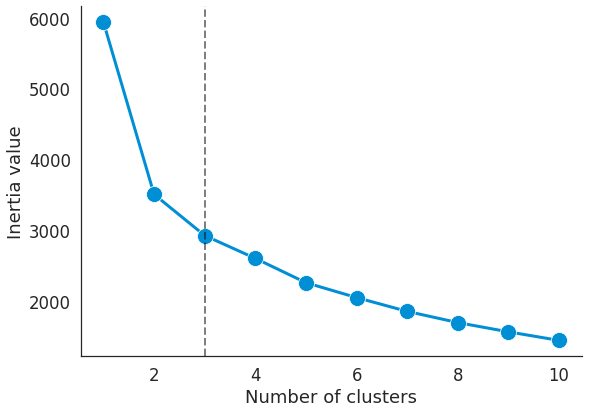

In [155]:
knee_locator = KneeLocator(np.arange(1,11), inertia_list,
                           S=1.0, curve='convex', direction='decreasing')

fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x=knee_locator.x, y=knee_locator.y,
             marker='o', linewidth=3, markersize=16, ax=ax)

for i in knee_locator.all_knees:
  ax.axvline(i, linewidth=2, linestyle='dashed', color='black', alpha=0.5)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia value')

sns.despine()
plt.show()

Cluster `3` is the knee location.

## Silhouette Method

In [156]:
sh_list = []
k_range = np.arange(2,11)

for num_clusters in k_range:
    model = KMeans(n_clusters=num_clusters)
    cluster_labels = model.fit_predict(X_norm)
   
    score = silhouette_score(X_norm, cluster_labels)
    sh_list.append(score)
    print(f'For n_clusters = {num_clusters}, silhouette score is {round(score, 3)}')

For n_clusters = 2, silhouette score is 0.387
For n_clusters = 3, silhouette score is 0.372
For n_clusters = 4, silhouette score is 0.322
For n_clusters = 5, silhouette score is 0.32
For n_clusters = 6, silhouette score is 0.334
For n_clusters = 7, silhouette score is 0.337
For n_clusters = 8, silhouette score is 0.316
For n_clusters = 9, silhouette score is 0.334
For n_clusters = 10, silhouette score is 0.342


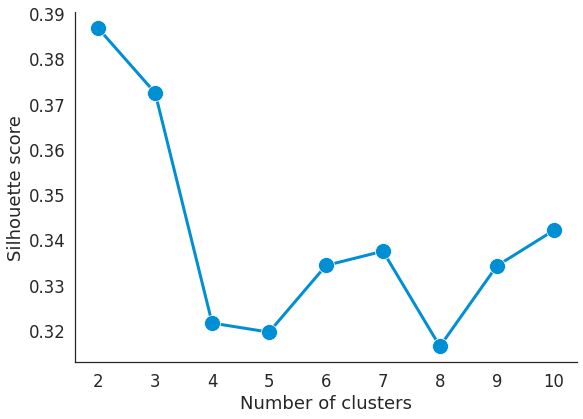

In [157]:
fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x=k_range, y=sh_list,
             marker='o', linewidth=3, markersize=16, ax=ax)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')

sns.despine()
plt.show()

Cluster `2` has the highest score.

## Build Model
Using the number of clusters from the silhouette method.

In [295]:
model = KMeans(n_clusters=2, random_state=1)

model.fit(X_norm)

KMeans(n_clusters=2, random_state=1)

### Assign Cluster Label

In [296]:
data_std['kmeans_cluster'] = model.labels_
data_norm['kmeans_cluster'] = model.labels_
data['kmeans_cluster'] = model.labels_

data_std.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,kmeans_cluster,kmedoids_cluster,dbscan_cluster
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068,1,1,0
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068,1,1,0
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068,0,0,0
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068,1,1,0
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068,1,1,0


### Cluster Centroids

In [297]:
model.cluster_centers_

array([[0.07382684, 0.93669405, 0.03734944, 0.02454818, 0.03694949,
        0.01203059, 0.89291899, 0.33621388, 0.72811427, 0.05181318,
        0.01589547, 0.08051338, 0.1631854 , 0.04064191, 0.01143589,
        0.25441817, 0.93337464],
       [0.08899069, 0.82848677, 0.00658913, 0.00631339, 0.00293436,
        0.02793815, 0.15985947, 0.0926497 , 0.06587449, 0.12152477,
        0.03504785, 0.00872315, 0.13624374, 0.02885651, 0.01074748,
        0.07104146, 0.90820617]])

## Visualization

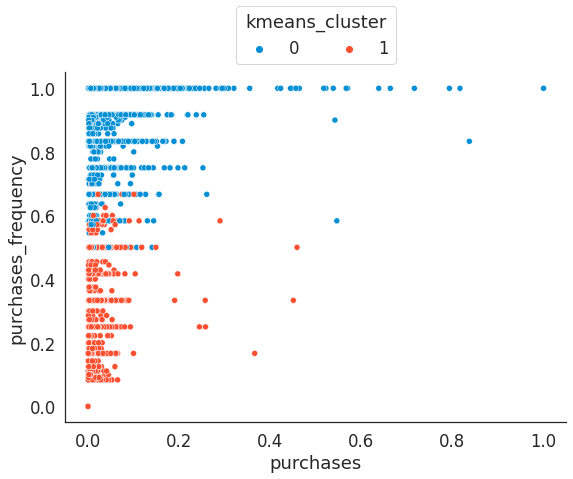

In [298]:
palette = ['#008FD5', '#FC4F30'] #, '#E5AE38'] # blue, red, yellow

fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(data=data_norm, x='purchases', y='purchases_frequency', hue='kmeans_cluster', palette=palette, ax=ax)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3, title='kmeans_cluster')

sns.despine()
plt.show()

# K-Medoids

## Elbow Method

In [193]:
inertia_list = []
k_range = np.arange(1,11)

for num_clusters in k_range:
    model = KMedoids(n_clusters=num_clusters)
    model.fit(X_norm)
    inertia_list.append(model.inertia_)
    print(f'For n_clusters = {num_clusters}, inertia value is {round(model.inertia_,3)}')

For n_clusters = 1, inertia value is 7040.85
For n_clusters = 2, inertia value is 5170.69
For n_clusters = 3, inertia value is 4761.991
For n_clusters = 4, inertia value is 4505.859
For n_clusters = 5, inertia value is 4184.874
For n_clusters = 6, inertia value is 4105.118
For n_clusters = 7, inertia value is 3914.914
For n_clusters = 8, inertia value is 3669.785
For n_clusters = 9, inertia value is 3492.314
For n_clusters = 10, inertia value is 3374.557


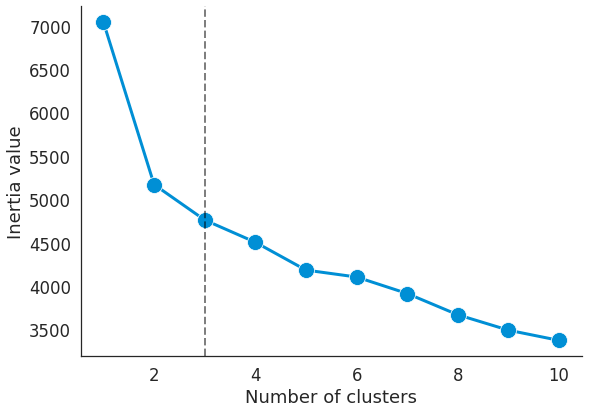

In [194]:
knee_locator = KneeLocator(np.arange(1,11), inertia_list,
                           S=1.0, curve='convex', direction='decreasing')

fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x=knee_locator.x, y=knee_locator.y,
             marker='o', linewidth=3, markersize=16, ax=ax)

for i in knee_locator.all_knees:
  ax.axvline(i, linewidth=2, linestyle='dashed', color='black', alpha=0.5)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia value')

sns.despine()
plt.show()

Cluster `3` is the knee location.

## Silhouette Method

In [195]:
sh_list = []
k_range = np.arange(2,11)

for num_clusters in k_range:
    model = KMedoids(n_clusters=num_clusters)
    cluster_labels = model.fit_predict(X_norm)
   
    score = silhouette_score(X_norm, cluster_labels)
    sh_list.append(score)
    print(f'For n_clusters = {num_clusters}, silhouette score is {round(score, 3)}')

For n_clusters = 2, silhouette score is 0.383
For n_clusters = 3, silhouette score is 0.369
For n_clusters = 4, silhouette score is 0.244
For n_clusters = 5, silhouette score is 0.303
For n_clusters = 6, silhouette score is 0.181
For n_clusters = 7, silhouette score is 0.18
For n_clusters = 8, silhouette score is 0.183
For n_clusters = 9, silhouette score is 0.211
For n_clusters = 10, silhouette score is 0.212


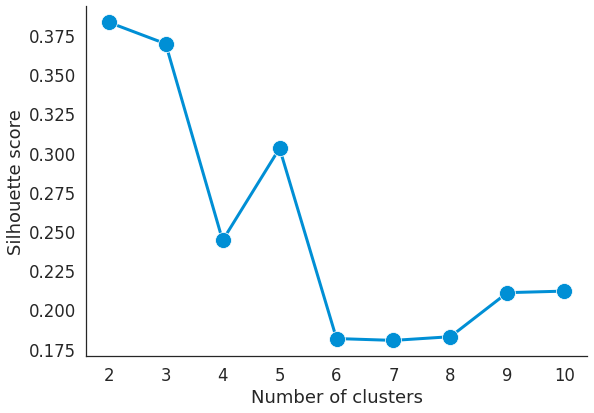

In [197]:
fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x=k_range, y=sh_list,
             marker='o', linewidth=3, markersize=16, ax=ax)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')

sns.despine()
plt.show()

Cluster `2` has the highest score.

## Build Model
Using the number of clusters from the elbow method.

In [198]:
model = KMedoids(n_clusters=2, random_state=1)

model.fit(X_norm)

KMedoids(n_clusters=2, random_state=1)

### Assign Cluster Label

In [199]:
data_std['kmedoids_cluster'] = model.labels_
data_norm['kmedoids_cluster'] = model.labels_
data['kmedoids_cluster'] = model.labels_

data_std.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,kmeans_cluster,kmedoids_cluster,dbscan_cluster
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068,1,1,0
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068,1,1,0
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068,0,0,0
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068,1,1,0
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068,1,1,0


### Cluster Centroids

In [200]:
model.cluster_centers_

array([[0.03497974, 1.        , 0.04077727, 0.00861112, 0.07327556,
        0.        , 0.916667  , 0.25      , 0.75      , 0.        ,
        0.        , 0.04189944, 0.10183639, 0.01315258, 0.0034594 ,
        0.2       , 1.        ],
       [0.05824527, 0.909091  , 0.00387442, 0.00466129, 0.        ,
        0.0317465 , 0.083333  , 0.083333  , 0.        , 0.11111133,
        0.04065041, 0.0027933 , 0.04841402, 0.01567757, 0.00433571,
        0.        , 1.        ]])

## Visualization

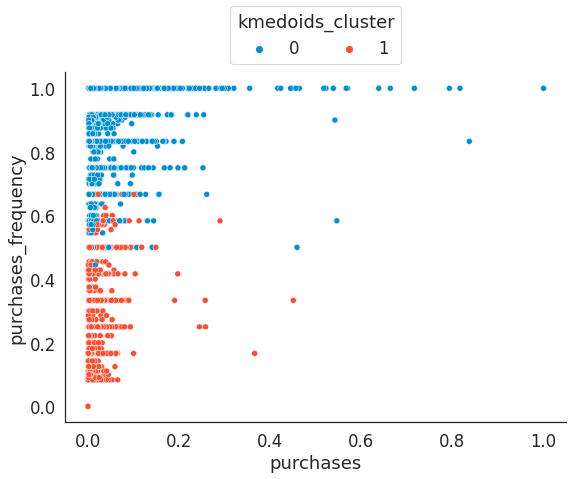

In [304]:
palette = ['#008FD5', '#FC4F30'] #, '#E5AE38', 'silver'] # blue, red, yellow

fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(data=data_norm, x='purchases', y='purchases_frequency', hue='kmedoids_cluster', palette=palette, ax=ax)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=4, title='kmedoids_cluster')

sns.despine()
plt.show()

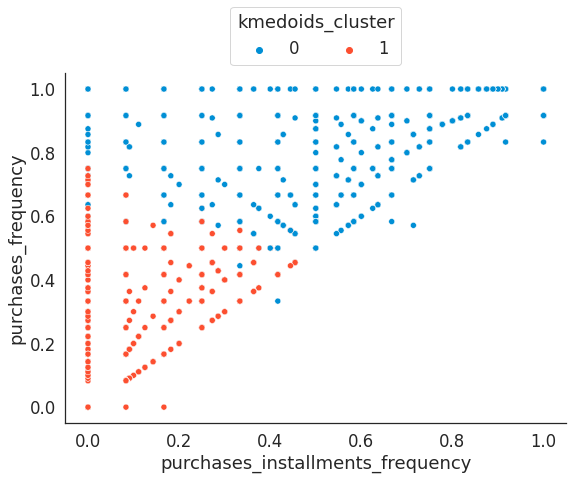

In [305]:
palette = ['#008FD5', '#FC4F30'] #, '#E5AE38', 'silver'] # blue, red, yellow

fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(data=data_norm, x='purchases_installments_frequency', y='purchases_frequency', hue='kmedoids_cluster', palette=palette, ax=ax)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=4, title='kmedoids_cluster')

sns.despine()
plt.show()

## Interpretation

In [203]:
data_agg = data.groupby('kmedoids_cluster').median()

data_agg.T.style.background_gradient(cmap='Blues', axis=1)

kmedoids_cluster,0,1
balance,536.264952,1087.140150
balance_frequency,1.000000,1.000000
purchases,959.465000,55.665000
oneoff_purchases,220.005000,0.000000
installments_purchases,478.165000,0.000000
cash_advance,0.000000,382.745501
purchases_frequency,1.000000,0.083333
oneoff_purchases_frequency,0.166667,0.000000
purchases_installments_frequency,0.833333,0.000000
cash_advance_frequency,0.000000,0.100000


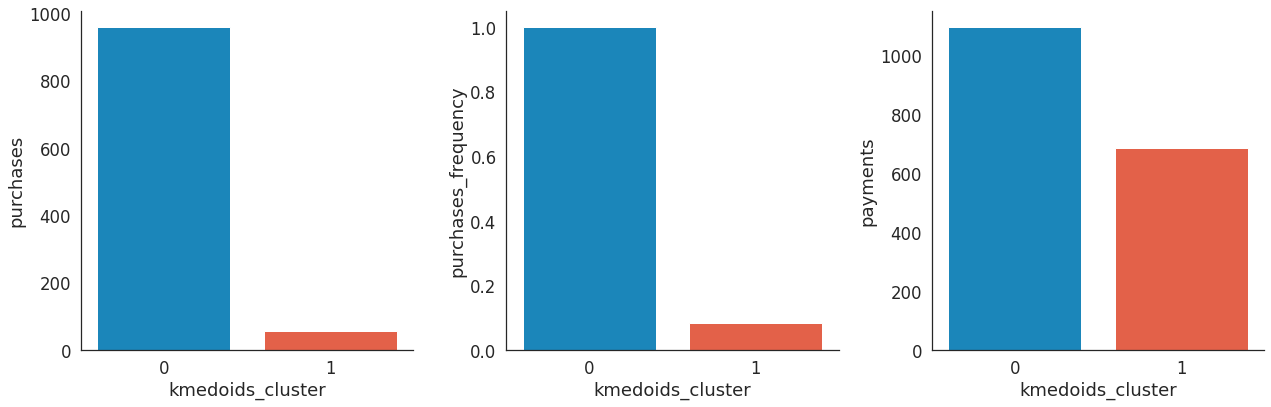

In [208]:
column_list = ['purchases', 'purchases_frequency', 'payments']

fig, ax = plt.subplots(1,3, figsize=(18,6))

for i, col in enumerate(column_list):
  sns.barplot(data=data_agg.reset_index(), x='kmedoids_cluster', y=col, ax=ax[i])

sns.despine()
plt.tight_layout()
plt.show()

- Cluster 0: having the lowest amount of purchases, payments, and balance
- Cluster 1: having a moderate amount of purchases, payments, and balance
- Cluster 2: having the highest amount of purchases and payments, but a moderate amount of balance
- Cluster 3: having a moderate amount of purchases and payments, but the highest amount of balance

# DBSCAN

## K-Distance Graph

In [249]:
neighbors = NearestNeighbors(n_neighbors=34)
neighbors_fit = neighbors.fit(X_norm)
distances, indices = neighbors_fit.kneighbors(X_norm)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

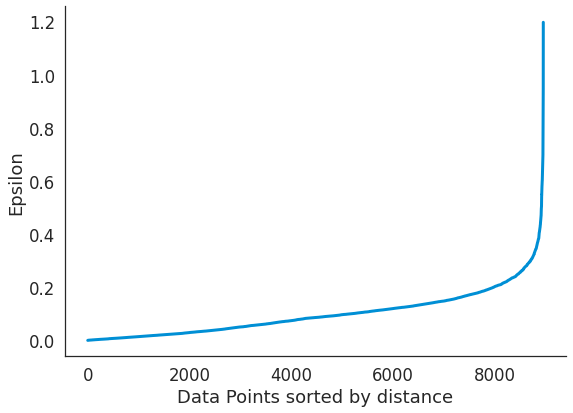

In [250]:
fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x=np.arange(0,len(distances)), y=distances, linewidth=3, ax=ax)

ax.set_xlabel('Data Points sorted by distance')
ax.set_ylabel('Epsilon')

sns.despine()
plt.show()

## Build Model

In [307]:
model = DBSCAN(eps=0.3, min_samples=34)

model.fit(X_norm)

DBSCAN(eps=0.3, min_samples=34)

In [308]:
np.unique(model.labels_)

array([-1,  0,  1])

## Assign Cluster Label

In [309]:
data_std['dbscan_cluster'] = model.labels_
data_norm['dbscan_cluster'] = model.labels_
data['dbscan_cluster'] = model.labels_

data_std.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,kmeans_cluster,kmedoids_cluster,dbscan_cluster
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068,1,1,0
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068,1,1,0
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068,0,0,0
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068,1,1,0
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068,1,1,0


In [310]:
print('Cluster : ', np.unique(model.labels_))

no_clusters = len(np.unique(model.labels_))
no_noise = np.sum(np.array(model.labels_) == -1, axis=0)
for i in range(-1, no_clusters-1):
  print('Cluster ', i, ' total member ', np.sum(np.array(model.labels_) == i))

print('Estimated no. of clusters:', no_clusters)
print('Estimated no. of noise points:', no_noise)

Cluster :  [-1  0  1]
Cluster  -1  total member  864
Cluster  0  total member  8016
Cluster  1  total member  70
Estimated no. of clusters: 3
Estimated no. of noise points: 864


## Removing Outliers
DBSCAN can be used as an outliers detection

In [311]:
data_clean = data_norm[data_norm['dbscan_cluster'] != -1]
data_clean.shape

(8086, 20)

## Visualization

### Clean Data

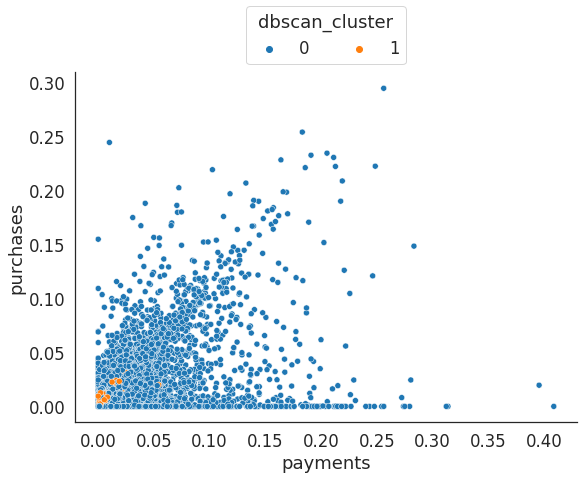

In [312]:
palette = ['#008FD5', '#FC4F30', '#E5AE38', 'silver'] # blue, red, yellow

fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(data=data_clean, x='payments', y='purchases', hue='dbscan_cluster', palette='tab10', ax=ax)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=4, title='dbscan_cluster')

sns.despine()
plt.show()

### Data with Noise

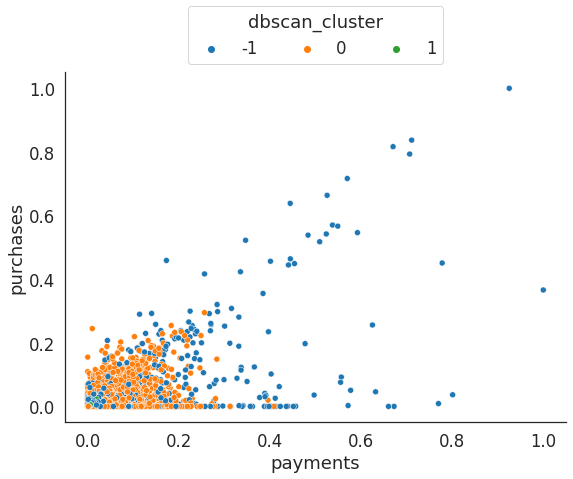

In [313]:
palette = ['#008FD5', '#FC4F30', '#E5AE38'] #, 'silver'] # blue, red, yellow

fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(data=data_norm, x='payments', y='purchases', hue='dbscan_cluster', palette='tab10', ax=ax)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=4, title='dbscan_cluster')

sns.despine()
plt.show()

# PCA

In [314]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [340]:
dist = 1 - cosine_similarity(X_std)

pca = PCA(n_components=0.95)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 6)

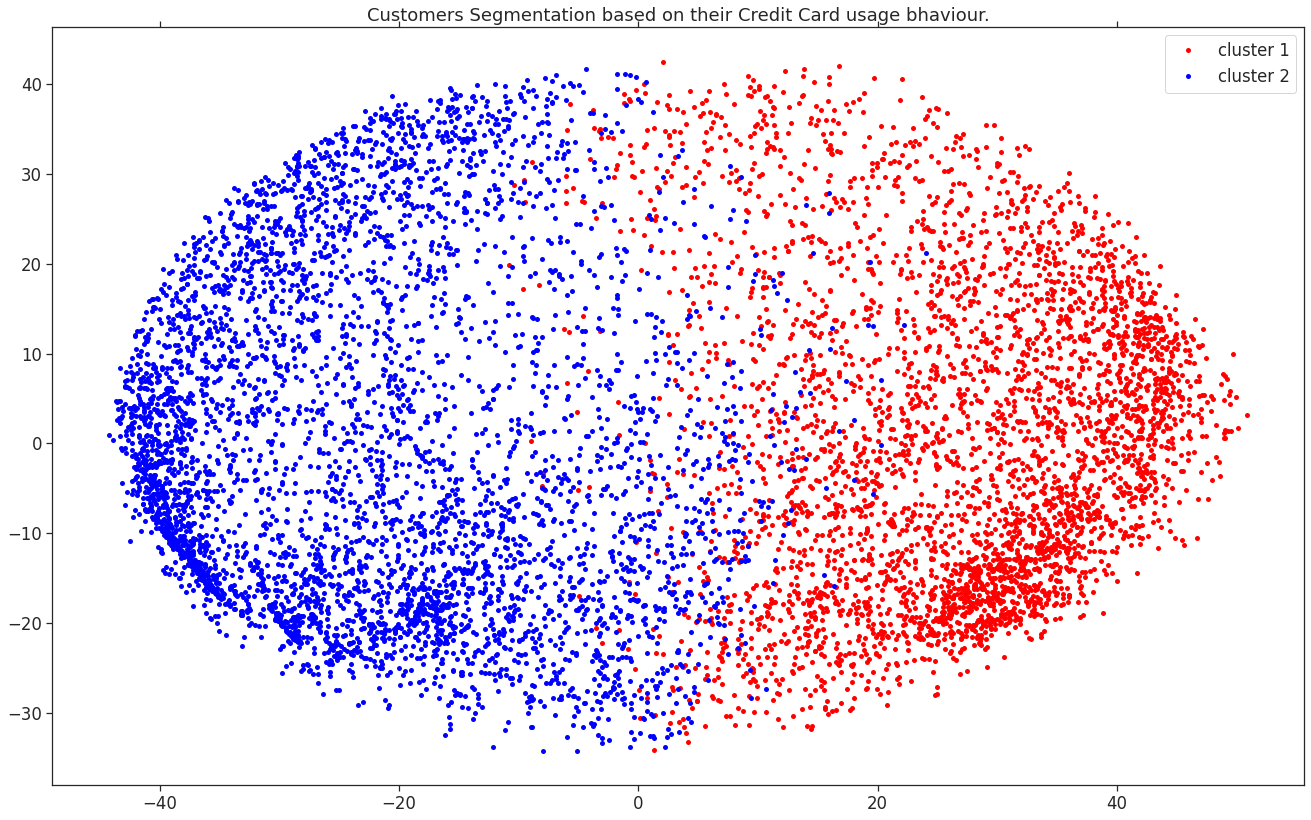

In [345]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

# colors = {0: 'red',
#           1: 'blue',
#           2: 'green', 
#           3: 'yellow', 
#           4: 'orange',  
#           5:'purple'}

# names = {0: 'who make all type of purchases', 
#          1: 'more people with due payments', 
#          2: 'who purchases mostly in installments', 
#          3: 'who take more cash in advance', 
#          4: 'who make expensive purchases',
#          5:'who don\'t spend much money'}

colors = {0: 'red',
          1: 'blue',
          2: 'green'}

names = {0: 'cluster 1', 
         1: 'cluster 2',
         2: 'cluster 3'}
  

data_tmp = data_norm.copy()
replacement = {-1:0, 0:1, 1:2}
data_tmp.replace({'dbscan_cluster':replacement}, inplace=True)

df = pd.DataFrame({'x': x, 'y':y, 'label':data_tmp['kmeans_cluster']}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
  ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
          color=colors[name],label=names[name], mec='none')
  ax.set_aspect('auto')
  ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
  ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

In [ ]:
dist = 1 - cosine_similarity(X_std)

pca_2 = PCA(2)
pca_2.fit(dist)
X_PCA = pca_2.transform(dist)
X_PCA.shape